In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#평활화(균일화)
img = cv2.imread('./stone.jpg',0)
img2 = cv2.equalizeHist(img)
cv2.imshow('img',img)
cv2.imshow('equalized img',img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
img = cv2.resize(img,(400,400))
img2 = cv2.resize(img2,(400,400))

In [4]:
dst = np.hstack((img,img2))
cv2.imshow('img',dst)
cv2.waitKey()
cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

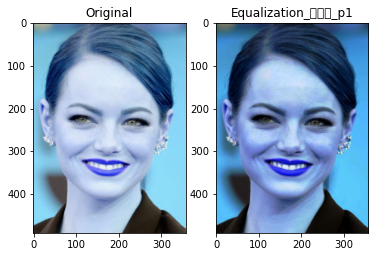

In [7]:
img = cv2.imread('./stone.jpg',)
hist, bins= np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(img2),plt.title('Equalization_박주희_p1')
plt.show

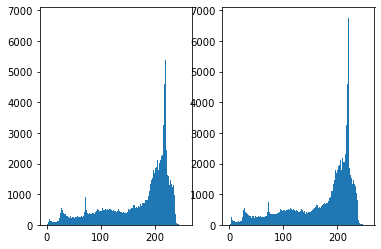

In [10]:
#히스토그램 스트레칭(명암대비)
src = cv2.imread('./stone.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
    
dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX) # 히스토그램 스트레칭은 NORM_MINMAX

# 넘파이로 히스토그램 스트레칭 구현
gmin = np.min(src)
gmax = np.max(src)
dst = np.clip((src - gmin) * 255. / (gmax - gmin), 0, 255).astype(np.uint8)

plt.figure()
plt.subplot(1, 2, 1)
plt.hist(src.ravel(), 256, [0, 256])
plt.subplot(1, 2, 2)
plt.hist(dst.ravel(), 256, [0, 256])
plt.show()

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

In [11]:
#히스토그램 엔드인
img = cv2.imread('./stone.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape 
MIN = gray.min() 
MAX = gray.max() 
out = gray.copy() 
low = int(input("하한값 : ")) 
high = int(input("상한값 : ")) 

for i in range(width): 
    for j in range(height):
        if gray[i][j] < low: 
            out[i][j] = 0
        elif gray[i][j] > high: 
            out[i][j] = 255 
        else: 
            out[i][j] = ((gray[i][j] - MIN) * 255) / (MAX - MIN)
                    
          
cv2.imshow('original', gray) 
cv2.imshow('end_in', out)
plt.figure() 
plt.subplot(1, 2, 1)
plt.hist(gray.ravel(), 256, [0, 256])
plt.subplot(1, 2, 2) 
plt.hist(out.ravel(), 256, [0, 256])
plt.show() 
cv2.waitKey()

하한값 : 10
상한값 : 100


IndexError: index 357 is out of bounds for axis 0 with size 357

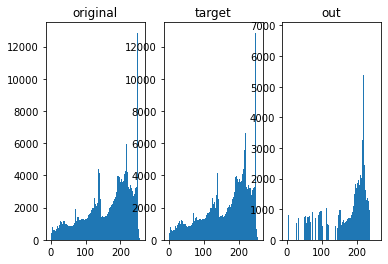

-1

In [12]:
#히스토그램 명세화

import cv2 
import matplotlib.pyplot as plt 
import numpy as np

img = cv2.imread('./stone.JPG') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
target = cv2.imread('./stone.JPG')
target_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY) 
shape = gray.shape 
original = gray.ravel()
specified = target_gray.ravel() 
s_values, bin_idx, s_counts = np.unique(original, return_inverse=True,
                                        return_counts=True)
t_values, t_counts = np.unique(specified, return_counts=True) 
s_quantiles = np.cumsum(s_counts).astype(np.float64)
s_quantiles /= s_quantiles[-1]
sour = np.around(s_quantiles * 255) 
t_quantiles = np.cumsum(t_counts).astype(np.float64)
t_quantiles /= t_quantiles[-1]
temp = np.around(t_quantiles * 255)
b = [] 
for data in sour:
    diff = temp - data
    mask = np.ma.less_equal(diff, -1)
    if np.all(mask): 
        c = np.abs(diff).argmin()
        b.append(c) 
    masked_diff = np.ma.masked_array(diff, mask)
    b.append(masked_diff.argmin())
    
LUT = np.array(b, dtype='uint8') 
out = np.array(LUT[bin_idx].reshape(shape)) 
cv2.imshow('original', gray) 
cv2.imshow('target', target_gray) 
cv2.imshow('out', out)


plt.figure()
plt.subplot(1, 3, 1)
plt.title('original')
plt.hist(img.ravel(), 256, [0, 256]) 
plt.subplot(1, 3, 2)
plt.title('target')
plt.hist(target.ravel(), 256, [0, 256])
plt.subplot(1, 3, 3)
plt.title('out')
plt.hist(out.ravel(), 256, [0, 256])
plt.show() 
cv2.waitKey(0)

